In [1]:
# libraries import
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from numpy.linalg import solve
from generate_signal import generate_sin

Text(0.5, 0, 'номер отсчета')

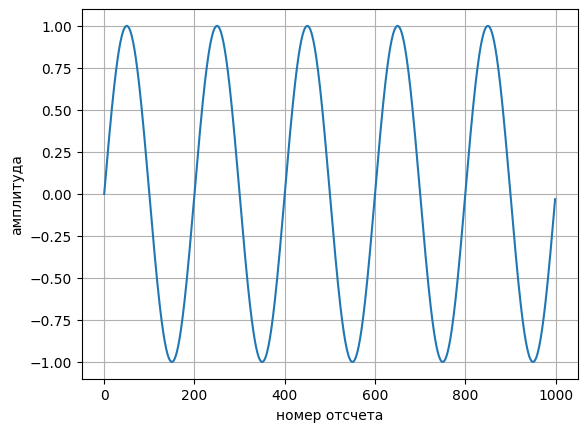

In [8]:
# signal generate
freq = 0.5
sample_count = 10  # number of samples

initial_signal = generate_sin(freq, sample_count)
plt.plot(initial_signal)
plt.grid()
plt.ylabel('амплитуда')
plt.xlabel('номер отсчета')